<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/dimensionality/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математические основы t-SNE

## Введение

t-Distributed Stochastic Neighbor Embedding (t-SNE) — это алгоритм для понижения размерности данных, разработанный Лоренсом ван дер Маатеном и Джорджем Хинтоном. Он особенно эффективен для визуализации высокоразмерных данных в двух- или трехмерном пространстве. Основная идея метода заключается в сохранении локальной структуры данных при их преобразовании из исходного пространства в пространство меньшей размерности.

В этой лекции мы рассмотрим математическую основу t-SNE, начиная с теоретических предпосылок и заканчивая детальным описанием его работы.



## 1. Цель t-SNE

Основная цель t-SNE — найти такое представление данных в низкоразмерном пространстве, чтобы соседние точки в исходном пространстве оставались близкими и несли ту же информацию о взаимодействиях между точками. При этом t-SNE уделяет особое внимание **локальной структуре** данных, а не глобальной.

Метод минимизирует дисперсию распределений вероятностей, которые описывают схожесть точек в исходном и целевом пространствах.




## 2. Построение распределений вероятностей

### 2.1. Распределение вероятностей в исходном пространстве

#### Исходные данные:
- У нас есть множество точек $x = \{x_1, x_2, \dots, x_n\}$, где каждая точка $x_i$ принадлежит исходному пространству размерности $D$. Это означает, что каждая точка имеет $D$ координат.
- Цель: определить, насколько близки или схожи между собой эти точки.

#### Как измеряем схожесть:
Мы используем функцию Гаусса (нормальное распределение) для определения условной вероятности того, что одна точка является "соседом" другой.

##### Шаг 1: Определяем условную вероятность $p_{j|i}$
Формула для $p_{j|i}$ выглядит так:
$$
p_{j|i} = \frac{\exp(-\|x_i - x_j\|^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\|x_i - x_k\|^2 / 2\sigma_i^2)},
$$
где:
- $\|x_i - x_j\| $ — это евклидово расстояние между точками $x_i$ и $x_j$. Оно показывает, насколько далеко одна точка от другой.
- $\sigma_i$ — параметр масштаба (ширина Гауссова распределения), который зависит от конкретной точки $x_i$. Он регулирует, как быстро убывают значения вероятности с увеличением расстояния.
- $\exp(-\|x_i - x_j\|^2 / 2\sigma_i^2) $ — это экспоненциальная функция, которая присваивает большие значения близким точкам и маленькие значения далеким точкам.
- Знаменатель нормализует все вероятности, чтобы их сумма была равна 1.

Итак, $p_{j|i}$ можно интерпретировать как вероятность того, что точка $x_j$ является соседом точки $x_i$.

##### Шаг 2: Симметризация распределения
Поскольку $p_{j|i}$ и $ p_{i|j}$ могут быть разными (то есть вероятность того, что $x_j$ является соседом $x_i$, может не совпадать с вероятностью того, что $x_i$ является соседом $x_j$), мы строим симметричное распределение:
$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}.
$$
Здесь:
- $ n $ — общее количество точек.
- $ p_{ij}$ — симметричная вероятность схожести между точками $x_i$ и $x_j$.

Таким образом, $ p_{ij}$ представляет собой меру того, насколько близки или схожи точки $x_i$ и $x_j$ в исходном пространстве.


### 2.2. Распределение вероятностей в целевом пространстве

#### Целевое пространство:
- Теперь мы хотим представить наши точки $y = \{y_1, y_2, \dots, y_n\}$ в новом пространстве меньшей размерности $D$ ($d \ll D$).
- Наша цель: найти такое расположение точек $y_i$, чтобы сохранить информацию о схожести между ними, аналогичную той, которая была в исходном пространстве.

#### Как измеряем схожесть:
В целевом пространстве мы используем другую функцию — t-распределение Стьюдента с одной степенью свободы (или распределение Коши).

##### Шаг 1: Определяем вероятность $q_{ij}$
Формула для $q_{ij}$ выглядит так:
$$
q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}},
$$
где:
- $\|y_i - y_j\| $ — это евклидово расстояние между точками $y_i$ и $y_j$ в целевом пространстве.
- $ (1 + \|y_i - y_j\|^2)^{-1}$ — это ядро t-распределения Стьюдента. Оно присваивает большие значения близким точкам и маленькие значения далеким точкам.
- Знаменатель нормализует все вероятности, чтобы их сумма была равна 1.

Итак, $q_{ij}$ можно интерпретировать как вероятность того, что точки $y_i$ и $y_j$ являются схожими в целевом пространстве.


### 2.3. Сравнение распределений

На основе этих распределений ($p_{ij}$ и $q_{ij}$) можно определить, насколько хорошо точки в целевом пространстве отражают их схожесть в исходном пространстве. Для этого обычно минимизируют некоторую функцию потерь, например, Kullback-Leibler дивергенцию между $ P $ и $Q$.



### **3. Минимизация дивергенции Кульбака–Лейблера**

Основная задача t-SNE заключается в том, чтобы найти такое представление данных $y = \{y_1, y_2, \ldots, y_n\}$ в низкоразмерном пространстве (целевом пространстве), которое наиболее точно отражает структуру исходных данных $x = \{x_1, x_2, \ldots, x_n\}$ в высокоразмерном пространстве. Для этого используются два распределения вероятностей:

- $ P = \{p_{ij}\}$: распределение схожести между точками $x_i$ и $x_j$ в исходном пространстве.
- $ Q = \{q_{ij}\}$: распределение схожести между точками $y_i$ и $y_j$ в целевом пространстве.

#### **Что такое дивергенция Кульбака–Лейблера?**
Дивергенция Кульбака–Лейблера измеряет различие между двумя распределениями вероятностей. Она определяется следующим образом:
$$
C = KL(P || Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}.
$$

Здесь:
- $ p_{ij}$ — вероятность того, что точки $x_i$ и $x_j$ являются близкими в исходном пространстве.
- $q_{ij}$ — вероятность того, что точки $y_i$ и $y_j$ являются близкими в целевом пространстве.

Чем меньше значение $C$, тем больше похожи распределения $ P $ и $Q$. Таким образом, минимизация $C$ означает, что мы пытаемся сделать так, чтобы распределение $Q$ в целевом пространстве максимально соответствовало распределению $ P $ в исходном пространстве.



### **4. Градиентный спуск**

Чтобы минимизировать функционал $C$, используется метод градиентного спуска. Этот метод позволяет обновлять положения точек $y_i$ в целевом пространстве таким образом, чтобы уменьшать значение $C$.

#### **Выражение для градиента**
Градиент функционала $C$ по координатам $y_i$ имеет следующий вид:
$$
\frac{\partial C}{\partial y_i} = 4 \sum_{j} (p_{ij} - q_{ij}) (y_i - y_j) (1 + \|y_i - y_j\|^2)^{-1}.
$$

Разберем это выражение по частям:
1. $ p_{ij} - q_{ij}$: это разница между вероятностями схожести в исходном и целевом пространствах. Если $ p_{ij} > q_{ij}$, то точки $y_i$ и $y_j$ должны быть ближе друг к другу; если $ p_{ij} < q_{ij}$, то они должны быть дальше.
2. $y_i - y_j$: это вектор, показывающий направление перемещения точки $y_i$ относительно $y_j$.
3. $ (1 + \|y_i - y_j\|^2)^{-1}$: это нормализующий множитель, зависящий от расстояния между точками $y_i$ и $y_j$. Он делает влияние удаленных точек менее значимым.

Таким образом, градиент указывает, как нужно изменить положение точки $y_i$, чтобы уменьшить различие между распределениями $ P $ и $Q$.

#### **Итерационное обновление точек**
Позиции точек $y_i$ обновляются согласно правилу градиентного спуска:
$$
y_i^{(t+1)} = y_i^{(t)} - \eta \frac{\partial C}{\partial y_i},
$$
где:
- $y_i^{(t)}$ — текущее положение точки $y_i$ на $t$-й итерации.
- $\eta $ — скорость обучения (learning rate). Этот параметр контролирует величину шага при обновлении точек.

На каждой итерации градиентный спуск вычисляет градиент $\frac{\partial C}{\partial y_i}$ для всех точек $y_i$ и обновляет их положения в соответствии с этим градиентом.


### **Дополнительные аспекты**

1. **Многомерная оптимизация**: Поскольку $y_i$ представляет собой многомерную точку (например, в 2D или 3D пространстве), градиентный спуск выполняется одновременно для всех координат каждой точки.

2. **Эвристики для улучшения сходимости**:
   - **Первоначальная инициализация**: Точки $y_i$ обычно инициализируются случайными малыми значениями, чтобы избежать застревания в плохих локальных минимумах.
   - **Мomentum**: В процессе градиентного спуска может использоваться техника momentum, которая помогает ускорить сходимость и преодолеть небольшие флуктуации градиента.
   - **Уменьшение скорости обучения**: Скорость обучения $\eta $ часто уменьшается по мере продвижения итераций, чтобы улучшить точность конечной оптимизации.

3. **Проблемы и ограничения**:
   - **Чувствительность к параметрам**: Результат работы t-SNE сильно зависит от выбора параметров, таких как скорость обучения $\eta $ и перплексия (perplexity).
   - **Неустойчивость**: Из-за нелинейности функции стоимости $C$ и сложности градиентного спуска, результаты могут быть нестабильными при разных запусках алгоритма.





### **5. Выбор параметров ширины Гауссова распределения ($\sigma_i$)**

#### **Что такое $\sigma_i$?**
Параметр $\sigma_i$ определяет ширину Гауссова распределения, используемого для вычисления вероятностей схожести $p_{j|i}$ между точками $x_i$ и $x_j$ в исходном пространстве. Конкретно, вероятность $p_{j|i}$ задается следующим образом:
$$
p_{j|i} = \frac{\exp\left(-\|x_i - x_j\|^2 / (2\sigma_i^2)\right)}{\sum_{k \neq i} \exp\left(-\|x_i - x_k\|^2 / (2\sigma_i^2)\right)},
$$
где:
- $\|x_i - x_j\| $ — евклидово расстояние между точками $x_i$ и $x_j$.
- $\sigma_i$ — ширина Гауссова распределения для точки $x_i$.

Ширина $\sigma_i$ влияет на то, как много соседей учитывается при вычислении вероятности $p_{j|i}$. Если $\sigma_i$ велико, то большее количество точек будет иметь значительные вероятности; если $\sigma_i$ мало, то только ближайшие соседи будут играть существенную роль.



#### **Как выбирается $\sigma_i$?**

Ширина $\sigma_i$ подбирается таким образом, чтобы среднее количество соседей (перплексия) соответствовало заданному значению. Процесс выбора $\sigma_i$ основывается на понятии **перплексии**.



### **Что такое перплексия?**

Перплексия — это мера, которая описывает эффективное количество соседей для каждой точки $x_i$. Она связана с энтропией распределения $ P_i = \{p_{j|i}\}$ и определяется следующим образом:
$$
\text{Perplexity} = 2^{H(P_i)},
$$
где $ H(P_i) $ — энтропия распределения $ P_i$:
$$
H(P_i) = -\sum_{j \neq i} p_{j|i} \log_2 p_{j|i}.
$$

Здесь:
- $p_{j|i}$ — вероятность того, что точка $x_j$ является соседом точки $x_i$.
- $\log_2 p_{j|i}$ — логарифм вероятности с основанием 2.

Перплексия интерпретируется как "эффективное количество соседей" точки $x_i$. Например:
- Если перплексия равна 5, это означает, что распределение $ P_i$ ведет себя так, будто у точки $x_i$ есть примерно 5 значимых соседей.
- Если перплексия высока (например, 50), то распределение $ P_i$ учитывает больше соседей, включая более удаленные точки.



#### **Зачем нужна перплексия?**

Перплексия регулирует баланс между локальными и глобальными свойствами данных:
1. **Низкая перплексия**:
   - Фокусируется на локальных соседях.
   - Использует небольшое значение $\sigma_i$, чтобы учитывать только ближайшие точки.
   - Полезна для выявления тонких структур данных.

2. **Высокая перплексия**:
   - Учитывает более широкий контекст.
   - Использует большое значение $\sigma_i$, чтобы учитывать больше соседей.
   - Полезна для сохранения глобальной структуры данных.

Таким образом, выбор перплексии позволяет контролировать уровень детализации отображения данных: низкая перплексия подходит для анализа локальных кластеров, а высокая перплексия лучше сохраняет глобальные связи между точками.



#### **Как настраивается $\sigma_i$ для заданной перплексии?**

Для каждой точки $x_i$ ширина $\sigma_i$ выбирается таким образом, чтобы перплексия распределения $ P_i$ соответствовала заданному значению. Это достигается через следующий процесс:

1. **Инициализация $\sigma_i$**: Начинают с некоторого начального значения $\sigma_i$.

2. **Вычисление перплексии**:
   - Для текущего значения $\sigma_i$ вычисляют вероятности $p_{j|i}$.
   - На основе этих вероятностей вычисляют энтропию $ H(P_i) $.
   - Затем рассчитывают перплексию: $\text{Perplexity} = 2^{H(P_i)}$.

3. **Настройка $\sigma_i$**:
   - Если текущая перплексия меньше заданного значения, увеличивают $\sigma_i$, чтобы учесть больше соседей.
   - Если текущая перплексия больше заданного значения, уменьшают $\sigma_i$, чтобы сузить фокус на ближайших соседях.

4. **Итерационный процесс**: Этот процесс повторяется до тех пор, пока перплексия не станет достаточно близкой к заданному значению.


#### **Почему перплексия важна?**

1. **Универсальный параметр**: Перплексия предоставляет интуитивно понятный способ управления сложностью модели. Вместо того чтобы напрямую выбирать $\sigma_i$, пользователь может указать желаемое количество соседей через перплексию.

2. **Адаптивность**: Поскольку каждая точка имеет свою собственную ширину $\sigma_i$, метод адаптируется к плотности данных. В областях с высокой плотностью точек $\sigma_i$ будет меньше, а в областях с низкой плотностью — больше.

3. **Баланс между локальными и глобальными свойствами**: Перплексия позволяет контролировать trade-off между сохранением локальных и глобальных структур данных.



### **Примеры значений перплексии**

1. **Маленькая перплексия (5–10)**:
   - Подходит для выявления локальных кластеров.
   - Хорошо работает с данными, где важно сохранить тонкие структуры.

2. **Средняя перплексия (20–50)**:
   - Сбалансированный выбор для большинства задач.
   - Сохраняет как локальные, так и глобальные свойства данных.

3. **Большая перплексия (100+)**:
   - Подходит для больших наборов данных.
   - Фокусируется на глобальной структуре, но может терять локальные особенности.



## 6. Преимущества и ограничения t-SNE

### Преимущества:
1. Превосходные результаты для визуализации высокоразмерных данных.
2. Успешно сохраняет локальные структуры данных.
3. Работает с нелинейными зависимостями.

### Ограничения:
1. Трудно сохранять глобальную структуру данных.
2. Высокая вычислительная сложность.
3. Зависимость от выбора параметров (например, перплексии).
4. Отсутствие обратного отображения (необходимо обучать заново для новых данных).



## 7. Заключение

t-SNE — мощный инструмент для понижения размерности и визуализации данных. Его математическая основа строится на сравнении распределений вероятностей в исходном и целевом пространствах с использованием дивергенции Кульбака–Лейблера. Алгоритм эффективно работает с локальной структурой данных, но требует тщательной настройки параметров и значительных вычислительных ресурсов для больших наборов данных.

Таким образом, t-SNE представляет собой уникальный подход к понижению размерности, который сочетает в себе теорию вероятностей, градиентный спуск и анализ многообразий.








### Гипотетический числовой пример

#### 1. Исходные данные
Предположим, что у нас есть три точки в двумерном пространстве ($D = 2$):

$$
x_1 = (0, 0), \quad x_2 = (1, 1), \quad x_3 = (2, 2).
$$

Мы хотим применить t-SNE для понижения размерности этих данных до одномерного пространства ($d = 1$).



#### 2. Вычисление вероятностей схожести в исходном пространстве ($p_{ij}$)

##### Шаг 1: Выбор параметра масштаба ($\sigma_i$)
Для каждой точки выберем одинаковое значение ширины Гауссова распределения, например, $\sigma_i = 1$ для всех точек.

##### Шаг 2: Вычисление условных вероятностей ($p_{j|i}$)
Используем формулу:
$$
p_{j|i} = \frac{\exp(-\|x_i - x_j\|^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\|x_i - x_k\|^2 / 2\sigma_i^2)}.
$$

**Для точки $x_1 = (0, 0) $:**

- Расстояния до других точек:
  $$
  \|x_1 - x_2\| = \sqrt{(0 - 1)^2 + (0 - 1)^2} = \sqrt{2}, \quad \|x_1 - x_3\| = \sqrt{(0 - 2)^2 + (0 - 2)^2} = 2\sqrt{2}.
  $$

- Экспоненциальные значения:
  $$
  \exp(-\|x_1 - x_2\|^2 / 2) = \exp(-2 / 2) = \exp(-1) \approx 0.368,
  $$
  $$
  \exp(-\|x_1 - x_3\|^2 / 2) = \exp(-8 / 2) = \exp(-4) \approx 0.018.
  $$

- Нормализация:
  $$
  p_{2|1} = \frac{0.368}{0.368 + 0.018} \approx 0.952, \quad p_{3|1} = \frac{0.018}{0.368 + 0.018} \approx 0.048.
  $$

**Для точки $x_2 = (1, 1) $:**

- Расстояния до других точек:
  $$
  \|x_2 - x_1\| = \sqrt{2}, \quad \|x_2 - x_3\| = \sqrt{(1 - 2)^2 + (1 - 2)^2} = \sqrt{2}.
  $$

- Экспоненциальные значения:
  $$
  \exp(-\|x_2 - x_1\|^2 / 2) = \exp(-1) \approx 0.368, \quad \exp(-\|x_2 - x_3\|^2 / 2) = \exp(-1) \approx 0.368.
  $$

- Нормализация:
  $$
  p_{1|2} = \frac{0.368}{0.368 + 0.368} = 0.5, \quad p_{3|2} = \frac{0.368}{0.368 + 0.368} = 0.5.
  $$

**Для точки $x_3 = (2, 2) $:**

- Расчет аналогичен точке $x_1 $:
  $$
  p_{1|3} \approx 0.048, \quad p_{2|3} \approx 0.952.
  $$

##### Шаг 3: Симметризация распределения ($p_{ij}$)
$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}.
$$

Например:
$$
p_{12} = \frac{p_{2|1} + p_{1|2}}{2 \cdot 3} = \frac{0.952 + 0.5}{6} \approx 0.242.
$$

Аналогично вычисляем остальные значения:
$$
p_{13} \approx 0.016, \quad p_{23} \approx 0.242.
$$



#### 3. Вычисление вероятностей схожести в целевом пространстве ($q_{ij}$)

Предположим, что начальное расположение точек в целевом пространстве таково:
$$
y_1 = 0, \quad y_2 = 1, \quad y_3 = 2.
$$

Используем формулу для $q_{ij}$:
$$
q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}}.
$$

**Для пары $ (y_1, y_2) $:**
$$
\|y_1 - y_2\| = |0 - 1| = 1, \quad (1 + \|y_1 - y_2\|^2)^{-1} = (1 + 1^2)^{-1} = 0.5.
$$

Аналогично для других пар:
$$
q_{12} \approx 0.333, \quad q_{13} \approx 0.167, \quad q_{23} \approx 0.333.
$$



#### 4. Минимизация дивергенции Кульбака–Лейблера ($C$)
Вычислим Kullback-Leibler дивергенцию:
$$
C = KL(P || Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}.
$$

Например, для пары $ (1, 2) $:
$$
p_{12} \log \frac{p_{12}}{q_{12}} \approx 0.242 \log \frac{0.242}{0.333}.
$$

Суммируя по всем парам, получаем общее значение $C$.





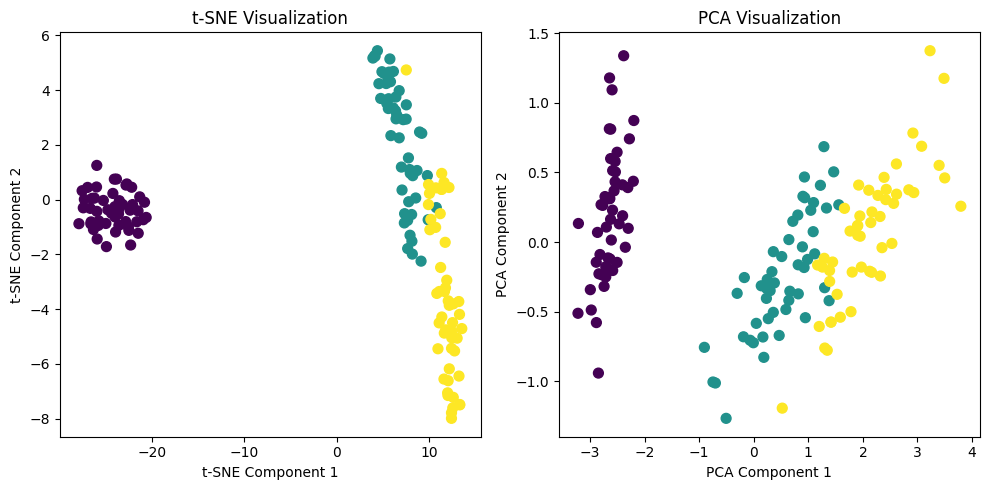

In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Загрузка данных Iris
data = load_iris()
X = data.data  # Признаки (4 измерения)
y = data.target  # Целевые метки (3 класса)

# Применяем t-SNE для понижения размерности до 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Визуализация результатов t-SNE
plt.figure(figsize=(10, 5))

# График для t-SNE
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Для сравнения применяем PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# График для PCA
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.title('PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Отображаем графики
plt.tight_layout()
plt.show()